In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

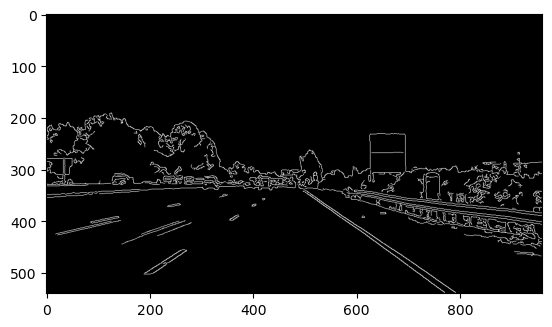

In [3]:
# read image
img_path = '../../img/'
img_file = 'image_lane_c.jpg'
img_bgr = cv2.imread(f'{img_path}/{img_file}')
img_grey = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_blur = cv2.GaussianBlur(img_grey, (5, 5), 0)
img_canny = cv2.Canny(img_blur, 40, 120)
plt.imshow(img_canny, cmap='gray')

In [4]:
img_canny.shape

(540, 960)

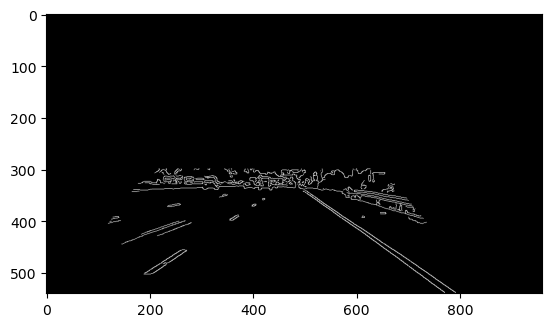

In [9]:
# arbitrary ROI
vertices = np.array([[(20,540),(200,300),(650,300),(850,540)]], dtype=np.int32)
# image in black with the same dimensions of the original image in grayscale
img_roi = np.zeros_like(img_grey)
# the ROI will be displayed in white over the black image
cv2.fillPoly(img_roi, vertices, 255)
# mask image
img_mask = cv2.bitwise_and(img_canny, img_roi)
plt.imshow(img_mask, cmap='gray')

In [12]:
rho = 2
theta = np.pi/180
threshold = 40
min_line_length = 50
max_line_gap = 10
lines = cv2.HoughLinesP(img_mask, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)
img_lines = np.zeros((img_mask.shape[0], img_mask.shape[1], 3), dtype=np.uint8)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(img_lines, (x1,y1), (x2,y2), [255, 0, 0], 30)

print(lines)

[[[579 394 791 537]]

 [[604 416 739 514]]

 [[368 328 513 328]]

 [[198 340 303 336]]

 [[214 324 273 324]]

 [[353 323 435 332]]

 [[740 503 792 538]]

 [[253 328 310 330]]

 [[450 321 539 321]]

 [[599 359 730 396]]

 [[176 433 268 400]]

 [[367 333 417 338]]

 [[178 328 240 326]]

 [[511 351 590 408]]

 [[448 334 504 338]]

 [[535 364 601 410]]

 [[458 322 510 330]]

 [[190 501 263 456]]

 [[210 500 272 457]]

 [[665 373 721 391]]

 [[437 318 487 319]]

 [[430 319 486 318]]

 [[708 493 771 538]]

 [[215 429 281 404]]

 [[184 426 257 401]]

 [[506 349 566 391]]

 [[609 420 744 518]]

 [[205 502 255 468]]]


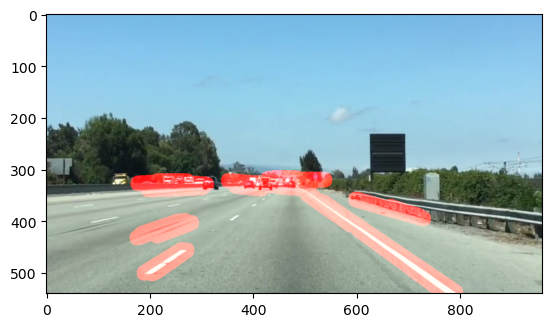

In [11]:
alpha = 1
beta = 1
gamma = 1
img_lane_lines = cv2.addWeighted(img_rgb, alpha, img_lines, beta, gamma)
plt.imshow(img_lane_lines)